In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Define model structure
def modelDefine():
    model = {
        'dense1': keras.layers.Dense(100, activation='tanh'),
        'dense2': keras.layers.Dense(50, activation='tanh'),
        'dense3': keras.layers.Dense(50, activation='tanh'),
        'dense4': keras.layers.Dense(50, activation='tanh'),
        'output_layer': keras.layers.Dense(1),
    }
    return model

In [ ]:
# Forward pass for the model
def call_model(model, inputs):
    xy = inputs
    for layer_name, layer in model.items():
        xy = layer(xy)
    return xy

In [ ]:
# Loss function with gradient calculation
def loss(E,x , x_b , y_b):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        E_c = call_model(E, x)  # Forward pass for (x, y)

        # Calculate gradients
        dE_dx = tape.gradient(E_c, x)
    d2E_dx2 = tape.gradient(dE_dx, x)

    E_b = call_model(E,x_b)

    #Calculate the loss components
    c1 = tf.reduce_mean(tf.square(d2E_dx2 + (np.pi**2)*tf.sin(np.pi*x)))
    b_loss = tf.reduce_mean(tf.square(E_b - y_b))

    res_loss = c1 + b_loss

    return res_loss

In [ ]:
x = np.linspace(-1.0,1.0,1500)
x_train , x_test = train_test_split(x , train_size = 0.8 , random_state=42)
x_b = np.array([[-1.0] , [0.0], [1.0]])
y_b = np.array([[0.0],[0.0],[0.0]])

In [ ]:
x_train = x_train.reshape(-1,1)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = x_test.reshape(-1,1)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
x_b = x_b.reshape(-1,1)
x_b = tf.convert_to_tensor(x_b, dtype=tf.float32)


In [ ]:
# Training function
def train(E, x , x_b , y_b , optimizer1):
    with tf.GradientTape(persistent=True) as tape:
        loss_value = loss(E, x , x_b , y_b)

    # E model updates
    E_grads = tape.gradient(loss_value, [layer.trainable_variables for layer in E.values()])
    E_grads = [grad for sublist in E_grads for grad in sublist]  # Flatten list of lists
    E_variables = [var for layer in E.values() for var in layer.trainable_variables]
    optimizer1.apply_gradients(zip(E_grads, E_variables))

    return loss_value


In [ ]:
# Define optimizer with learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer1 = tf.keras.optimizers.Adam(learning_rate=lr_scheduler)

In [ ]:
# Training loop
epochs = 1000
iter = []
loss_value = []
E = modelDefine()
for epoch in range(epochs + 1):
    loss_val = train(E, x_train , x_b , y_b, optimizer1)
    iter.append(epoch+1)
    loss_value.append(loss_val.numpy())
    if epoch % 100 == 0:
        print('Loss in the epoch {} is {}'.format(epoch, loss_val.numpy()))

Loss in the epoch 0 is 48.072654724121094
Loss in the epoch 100 is 0.19085273146629333
Loss in the epoch 200 is 0.029421798884868622
Loss in the epoch 300 is 0.014604699797928333
Loss in the epoch 400 is 0.007103791460394859
Loss in the epoch 500 is 0.004411654081195593
Loss in the epoch 600 is 0.003342509036883712
Loss in the epoch 700 is 0.0025475856382399797
Loss in the epoch 800 is 0.0019042531494051218
Loss in the epoch 900 is 0.0014147923793643713
Loss in the epoch 1000 is 0.0018396660452708602


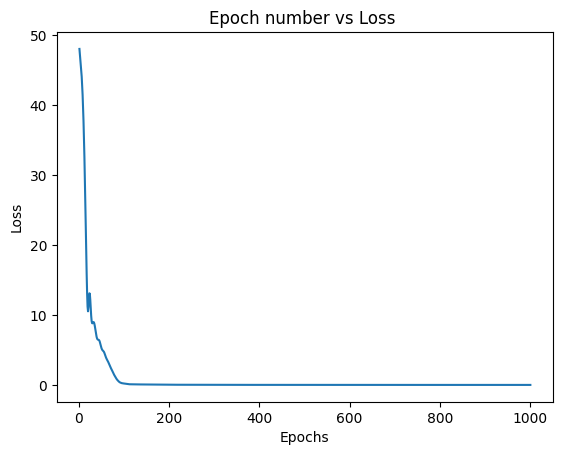

In [ ]:
plt.plot(iter , loss_value)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epoch number vs Loss ")
plt.show()

In [ ]:
y_pred = call_model(E , x_test)

In [ ]:
y_act = np.sin(np.pi*x_test)

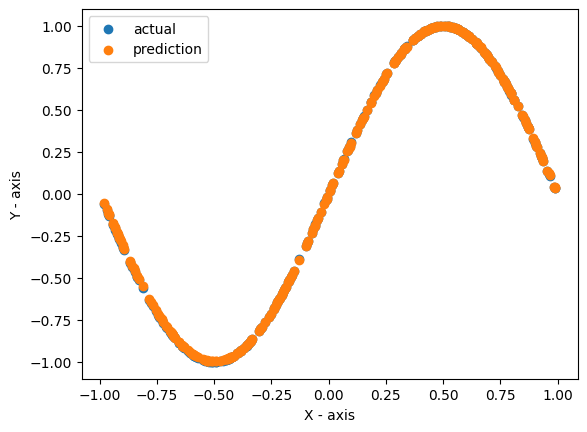

In [ ]:
plt.scatter(x_test , y_act , label = 'actual' )
plt.scatter(x_test , y_pred , label = 'prediction')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

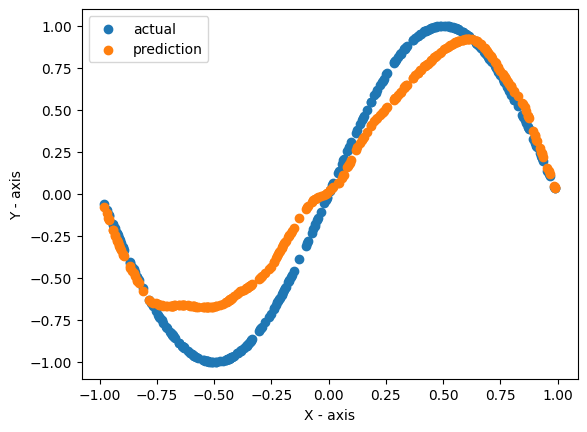

In [ ]:
plt.scatter(x_test , y_act , label = 'actual' )
plt.scatter(x_test , y_pred2 , label = 'prediction')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

In [ ]:
# Define optimizer with learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer1 = tf.keras.optimizers.Adam(learning_rate=lr_scheduler)

In [ ]:
# Training loop with early stopping approach

change_needed = 0.001
patience = 10
epochs = 1000
iter = []
loss_value = []
E1 = modelDefine()
for epoch in range(epochs + 1):
    loss_val = train(E1, x_train , x_b , y_b, optimizer1)
    iter.append(epoch+1)
    loss_value.append(loss_val.numpy())
    if epoch == 0 :
      continue
    if patience <= 0 :
      print('Early stopping due to non change in the loss value')
      break
    elif patience > 0 and abs(loss_val -loss_value[-2]) < change_needed:
      patience -= 1
    else:
      patience = 10
    if epoch % 100 == 0:
        print('Loss in the epoch {} is {}'.format(epoch, loss_val.numpy()))

Loss in the epoch 100 is 0.2627924382686615
Early stopping due to non change in the loss value


In [ ]:
y_pred = call_model(E1 , x_test)

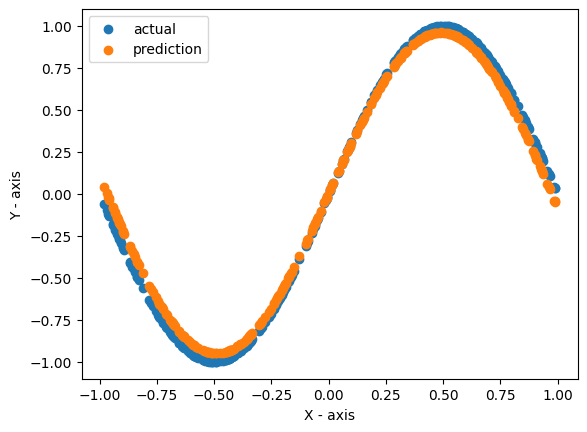

In [ ]:
plt.scatter(x_test , y_act , label = 'actual' )
plt.scatter(x_test , y_pred , label = 'prediction')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()

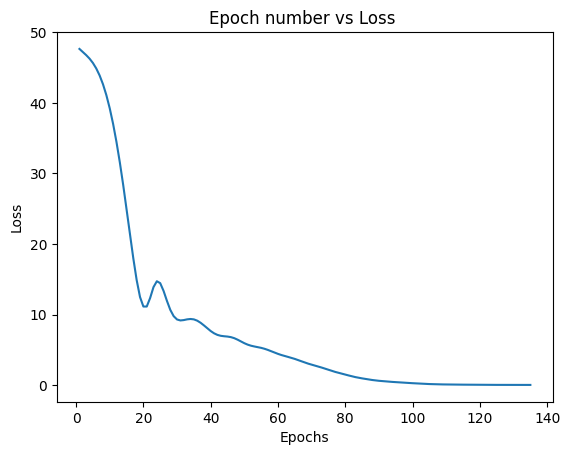

In [ ]:
plt.plot(iter , loss_value)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Epoch number vs Loss ")
plt.show()

d2y/dx2 + (pi^2)y = 0

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Define model structure
def modelDefine():
    model = {
        'dense1': keras.layers.Dense(100, activation='linear'),
        'dense2': keras.layers.Dense(50, activation='linear'),
        'dense3': keras.layers.Dense(50, activation='tanh'),
        'dense4': keras.layers.Dense(50, activation='tanh'),
        'output_layer': keras.layers.Dense(1),
    }
    return model

In [ ]:
# Forward pass for the model
def call_model(model, inputs):
    xy = inputs
    for layer_name, layer in model.items():
        xy = layer(xy)
    return xy

In [ ]:
# Loss function with gradient calculation
def loss(E,x , x_b , y_b):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        E_c = call_model(E, x)  # Forward pass for (x, y)

        # Calculate gradients
        dE_dx = tape.gradient(E_c, x)
    d2E_dx2 = tape.gradient(dE_dx, x)

    E_b = call_model(E,x_b)

    #Calculate the loss components
    c1 = tf.reduce_mean(tf.square(d2E_dx2 + (np.pi**2)*E_c))
    b_loss = tf.reduce_mean(tf.square(E_b - y_b))

    res_loss = c1 + b_loss

    return res_loss

In [ ]:
# Training function
def train(E, x , x_b , y_b , optimizer1):
    with tf.GradientTape(persistent=True) as tape:
        loss_value = loss(E, x , x_b , y_b)

    # E model updates
    E_grads = tape.gradient(loss_value, [layer.trainable_variables for layer in E.values()])
    E_grads = [grad for sublist in E_grads for grad in sublist]  # Flatten list of lists
    E_variables = [var for layer in E.values() for var in layer.trainable_variables]
    optimizer1.apply_gradients(zip(E_grads, E_variables))

    return loss_value


In [ ]:
x = np.linspace(-1.0,1.0,1500)
x_train , x_test = train_test_split(x , train_size = 0.8 , random_state=42)
x_b = np.array([[-1.0] , [1.0]])
y_b = np.array([[0.0],[0.0]])

In [ ]:
x_train = x_train.reshape(-1,1)
x_train = tf.convert_to_tensor(x_train, dtype=tf.float32)
x_test = x_test.reshape(-1,1)
x_test = tf.convert_to_tensor(x_test, dtype=tf.float32)
x_b = x_b.reshape(-1,1)
x_b = tf.convert_to_tensor(x_b, dtype=tf.float32)


In [ ]:
# Define optimizer with learning rate scheduler
lr_scheduler = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9
)
optimizer1 = tf.keras.optimizers.Adam(learning_rate=lr_scheduler)

In [ ]:
# Training loop
epochs = 1000
E = modelDefine()
for epoch in range(epochs + 1):
    loss_val = train(E, x_train , x_b , y_b, optimizer1)
    if epoch % 100 == 0:
        print('Loss in the epoch {} is {}'.format(epoch, loss_val.numpy()))

Loss in the epoch 0 is 1.9705721139907837
Loss in the epoch 100 is 2.102870166709181e-05
Loss in the epoch 200 is 1.1621993962762645e-06
Loss in the epoch 300 is 9.994622587328195e-07
Loss in the epoch 400 is 8.362324592781079e-07
Loss in the epoch 500 is 6.834458190496662e-07
Loss in the epoch 600 is 5.476643423207861e-07
Loss in the epoch 700 is 4.314500188229431e-07
Loss in the epoch 800 is 3.348675647885102e-07
Loss in the epoch 900 is 2.5671448611319647e-07
Loss in the epoch 1000 is 1.9475051260542386e-07


In [ ]:
y_pred = call_model(E , x_test)

In [ ]:
y_act = np.sin(np.pi*x_test)

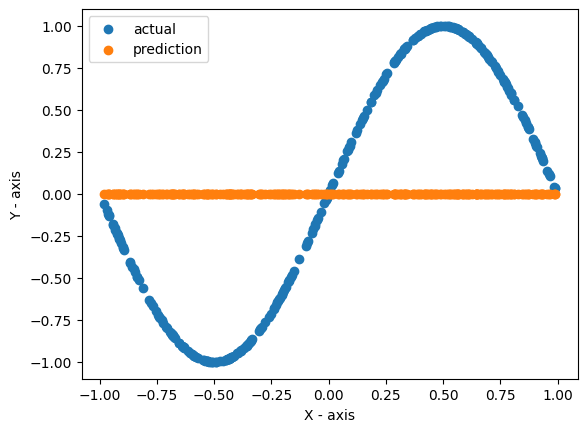

In [ ]:
plt.scatter(x_test , y_act , label = 'actual' )
plt.scatter(x_test , y_pred , label = 'prediction')
plt.xlabel('X - axis')
plt.ylabel('Y - axis')
plt.legend()
plt.show()